Question 1

The standard deviation of the original data is the variability among individual darta points in a single sample, while the standard error of the mean captures the variability of the sample mean across different samples, which may be randomly taken as part of the bootstrapping process.



Question 2

Calculate the Sample Mean: Compute the mean of your original data.

Compute the Standard Error (SEM): Use the standard deviation of your bootstrapped sample means as the SEM.

Determine the Critical Value: For a 95% confidence interval and assuming a normal distribution of the sample means (which is often reasonable due to the Central Limit Theorem), the critical value is approximately 1.96.

Calculate the Margin of Error:

Margin of Error=Critical Value×SEM=1.96×SEM
Construct the Confidence Interval:

Lower Limit: 
Sample Mean−Margin of Error

Upper Limit: 
Sample Mean+Margin of Error

The interval between the lower and upper limit will cover 95% of the bootstrapped sample mean by assuming a normal distribution and using the critical values. 

Question 3

Use the percentile method by selecting the 2.5 and 97.5 percentiles of the bootstrapped means. The resulting interval represents the range where 95% of the bootstrapped data lies. This method is good because it does not assume any kind of distribution.

Question 4


In [1]:
import numpy as np

# Sample data (replace this with your actual data)
data = np.array([12, 15, 13, 17, 19, 11, 14, 18, 16, 20])

# Number of bootstrap samples (more samples lead to more accurate estimates)
n_bootstrap = 10000

# Array to store bootstrap estimates
bootstrap_estimates = np.empty(n_bootstrap)

# Perform bootstrap resampling
for i in range(n_bootstrap):
    # Resample the data with replacement to create a bootstrap sample
    bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
    
    # Calculate the statistic of interest; here it's the mean of the bootstrap sample
    bootstrap_estimates[i] = np.mean(bootstrap_sample)
    
    # -----------------------------------------------------------
    # To calculate a different statistic (e.g., median), modify the line above:
    # For median:
    # bootstrap_estimates[i] = np.median(bootstrap_sample)
    #
    # For variance (using ddof=1 for an unbiased estimate):
    # bootstrap_estimates[i] = np.var(bootstrap_sample, ddof=1)
    #
    # For standard deviation (using ddof=1 for an unbiased estimate):
    # bootstrap_estimates[i] = np.std(bootstrap_sample, ddof=1)
    #
    # By changing np.mean to the desired function, you can compute the bootstrap estimates
    # for different population parameters.
    # -----------------------------------------------------------

# Compute the 2.5th and 97.5th percentiles for the 95% confidence interval
lower_bound = np.percentile(bootstrap_estimates, 2.5)
upper_bound = np.percentile(bootstrap_estimates, 97.5)

# Output the results
print(f"95% Bootstrap Confidence Interval for the Mean: [{lower_bound:.2f}, {upper_bound:.2f}]")

# -----------------------------------------------------------
# If you calculated a different statistic, update the print statement accordingly:
#
# For median:
# print(f"95% Bootstrap Confidence Interval for the Median: [{lower_bound:.2f}, {upper_bound:.2f}]")
#
# For variance:
# print(f"95% Bootstrap Confidence Interval for the Variance: [{lower_bound:.2f}, {upper_bound:.2f}]")
#
# For standard deviation:
# print(f"95% Bootstrap Confidence Interval for the Standard Deviation: [{lower_bound:.2f}, {upper_bound:.2f}]")
#
# Ensure that the text reflects the statistic you're calculating to avoid confusion.
# -----------------------------------------------------------

# Notes on adjusting the confidence level:
# -----------------------------------------------------------
# To change the confidence interval (e.g., to 90% or 99%), adjust the percentiles:
#
# For a 90% confidence interval (lower 5th and upper 95th percentiles):
# lower_bound = np.percentile(bootstrap_estimates, 5)
# upper_bound = np.percentile(bootstrap_estimates, 95)
#
# For a 99% confidence interval (lower 0.5th and upper 99.5th percentiles):
# lower_bound = np.percentile(bootstrap_estimates, 0.5)
# upper_bound = np.percentile(bootstrap_estimates, 99.5)
#
# Remember to update the print statement to reflect the new confidence level.
# -----------------------------------------------------------

# Additional Notes:
# -----------------------------------------------------------
# - The variable 'data' should contain your sample data as a NumPy array.
# - The 'n_bootstrap' variable determines how many bootstrap samples are generated;
#   a higher number provides a more accurate estimate but requires more computation time.
# - The 'bootstrap_estimates' array stores the statistic calculated from each bootstrap sample.
# - By resampling with replacement, we simulate the process of sampling from the population,
#   allowing us to estimate the sampling distribution of the statistic.
# - The percentile method used here does not assume any specific distribution for the data,
#   making it a non-parametric approach suitable for various types of data.
# -----------------------------------------------------------


95% Bootstrap Confidence Interval for the Mean: [13.80, 17.30]


Question 5

The population parameter and the sample statistic need to be distinguished because the confidence interval uses the variability of the sample statistic to estimate the constant population parameter. This distinction clarifies that confidence intervals measure the variability in our estimate of the population parameter based on the sample data. 

Question 6

What is the process of bootstrapping?

So, imagine you have a small set of data, like test scores from a class of students, and you want to understand more about the overall population based on this sample. Bootstrapping is a neat statistical trick where we take our original data and create lots of "new" samples from it to see how the results might vary.

Here's how it works:

Resampling Your Data: You randomly pick data points from your original sample with replacement. This means you might pick the same data point more than once for a new sample.

Creating Many Samples: You repeat this process many times (often thousands), creating a bunch of "bootstrap samples".

Calculating Statistics: For each of these samples, you calculate the statistic you're interested in, like the mean or median.

Analyzing the Results: You end up with a distribution of these statistics, which shows you how much the statistic might vary.

So basically, bootstrapping lets you simulate what might happen if you took many samples from the population, all by using just the data you have.

What is the main purpose of bootstrapping?

The main goal of bootstrapping is to estimate the uncertainty or variability in a statistic (like the average) when we don't know much about the larger population or when it's tough to make assumptions about it.

In simpler terms, it helps us answer questions like, "If I took another sample, how much might my average change?" or "How confident can I be in the average I've calculated from my data?"

Since we often can't collect endless samples or know everything about the whole population, bootstrapping uses the data we do have to mimic this process. It gives us a way to understand the possible range and reliability of our estimates without needing more data.

If you had a (hypothesized) guess about what the average of a population was, and you had a sample of size n from that population, how could you use bootstrapping to assess whether or not your (hypothesized) guess might be plausible?

Let's say you think the average height of all adult men in a city is 175 cm, but you're not sure. You have a sample of heights from, say, 50 men. Here's how you could use bootstrapping to check if your guess is plausible:

Calculate Your Sample Mean: First, compute the average height from your sample. Let's say it's 172 cm.

Bootstrap Your Sample:

Resample: Create many (like 10,000) new samples from your original data by randomly picking heights with replacement.
Compute Means: Calculate the average height for each of these bootstrap samples.
Create a Distribution: You'll now have a distribution of bootstrap means, which shows you how your sample mean might vary.

Construct a Confidence Interval:

Find the range where, say, 95% of your bootstrap means lie. This is your 95% confidence interval.
For example, maybe this interval is from 170 cm to 174 cm.
Assess Your Hypothesized Mean:

Check if your hypothesized average (175 cm) falls within this confidence interval.
In this example, 175 cm is outside the interval of 170–174 cm.
Draw a Conclusion:

Since 175 cm isn't within the interval where most of your sample means fall, it suggests that your guess might not be plausible based on your data.
If 175 cm were inside the interval, it would indicate that your guess is consistent with your sample data.
So, by using bootstrapping, you're essentially testing whether your hypothesized average is a reasonable estimate given the variability observed in your sample. It's a way to see if your data supports your guess or if there's a significant difference.

Summary of the Interaction (Couldn't get a chatbot link)

Standard Error of the Mean vs. Standard Deviation: The standard deviation (SD) measures the spread of individual data points in a sample, while the standard error of the mean (SEM) measures the variability of the sample mean across different samples. SEM reflects the precision of the sample mean as an estimate of the population mean, while SD captures the variability within the data.

Bootstrapping: Bootstrapping is a resampling method that involves taking random samples from the original data (with replacement) to create many new samples. It is used to estimate the variability of a statistic (e.g., mean, median) without making assumptions about the population distribution.

Confidence Interval Using SEM: To create a 95% confidence interval for a population mean, you use the SEM and multiply it by the critical value (approximately 1.96 for a 95% interval). The interval is the sample mean plus and minus this margin of error, representing the range within which the true population mean likely falls.

Percentile Method for Bootstrapping: Instead of using SEM, you can create a 95% confidence interval for the mean by calculating the 2.5th and 97.5th percentiles of the bootstrapped means. This method directly captures the variability in the sample means and provides a non-parametric confidence interval.

Applying Bootstrapping to Different Statistics: Code can be used to calculate a 95% bootstrap confidence interval for the mean, and with slight modifications, it can be adapted to compute confidence intervals for other statistics, such as the median or standard deviation. This involves changing the function that calculates the statistic during resampling.

Distinguishing Between Population Parameters and Sample Statistics: Confidence intervals are constructed around sample statistics to estimate unknown population parameters. It is important to distinguish between the two because the confidence interval reflects the uncertainty in the sample statistic’s ability to estimate the true population parameter.

Explaining Bootstrapping Informally: Bootstrapping is a method to assess how much a sample statistic (e.g., mean or median) might vary by resampling the data many times. It is used when you don't have access to the entire population and helps provide confidence intervals for the statistic without assuming a particular population distribution.

This prompt covers key concepts in bootstrapping, confidence intervals, and their practical applications in estimating population parameters from sample data.

Question 7

In hypothesis testing, the null hypothesis (H₀) typically states that there is no effect or no difference—in this case, that the drug has no effect on average. A confidence interval provides a range of values within which we believe the true population parameter (such as the mean effect of the drug) lies.

If the confidence interval includes zero, it means that zero is a plausible value for the true effect. This suggests that we cannot rule out the possibility that the drug has no effect (or that any observed effect might be due to random variation), leading us to fail to reject the null hypothesis. Even though the observed sample mean may not be zero, the uncertainty in our estimate is large enough that zero is still a plausible outcome.

To reject the null hypothesis, the confidence interval would need to exclude zero, indicating that the true effect is unlikely to be zero, thus supporting the idea that the drug has a significant effect.

Vaccine Data Analysis Assignment

Problem Introduction

AliTech has developed a new vaccine aimed at improving the health of individuals who receive it. The primary objective of this analysis is to evaluate the effectiveness of the vaccine by comparing the initial and final health scores of patients. By employing statistical methods, we aim to determine whether the observed changes in health scores can be attributed to the vaccine or if they are merely due to random variation.

Explanation of the Null Hypothesis of "No Effect"
In this context, the null hypothesis (H₀) posits that the vaccine has no effect on the health of the patients. Specifically, it assumes that there is no significant difference between the initial and final health scores after administering the vaccine. 

Formally, this can be stated as:

H₀: The mean difference in health scores (FinalHealthScore - InitialHealthScore) is equal to zero.
Conversely, the alternative hypothesis (H₁) suggests that the vaccine does have a significant effect:

H₁: The mean difference in health scores is not equal to zero.
Our analysis will focus on testing this null hypothesis to determine whether we can reject it in favor of the alternative hypothesis.

vaccine_data.csv has been created successfully.


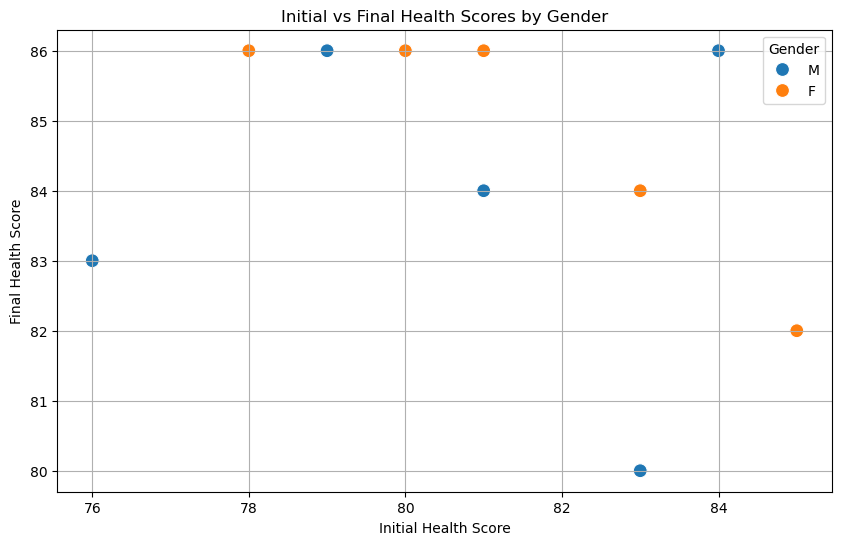

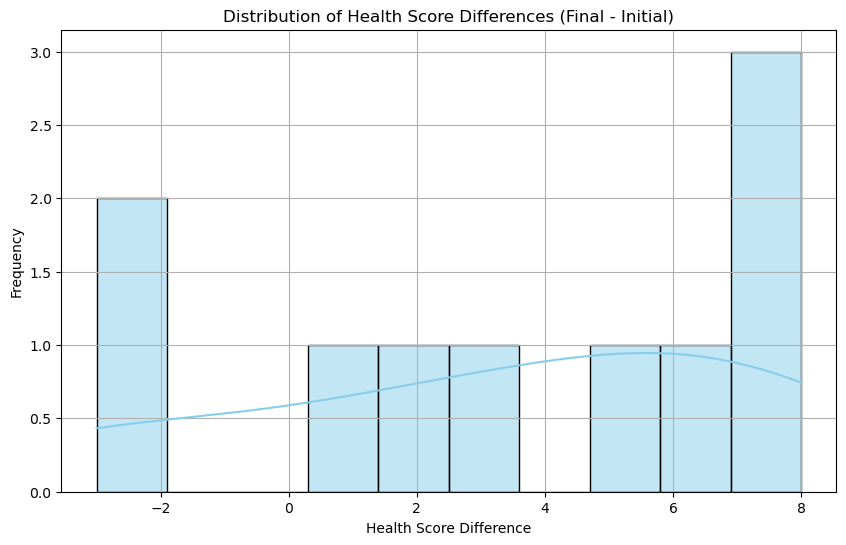

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# ---------------------------
# Step 1: Create the CSV File
# ---------------------------

# Define the data
data_dict = {
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

# Create a DataFrame
df = pd.DataFrame(data_dict)

# Export the DataFrame to a CSV file
csv_filename = 'vaccine_data.csv'
df.to_csv(csv_filename, index=False)
print(f"{csv_filename} has been created successfully.")

# ---------------------------
# Step 2: Read and Analyze the Data
# ---------------------------

# Read the CSV data
data = pd.read_csv(csv_filename)

# Calculate the difference in health scores
data['HealthScoreDifference'] = data['FinalHealthScore'] - data['InitialHealthScore']

# Data Visualization

# Plot Initial vs Final Health Scores
plt.figure(figsize=(10, 6))
sns.scatterplot(x='InitialHealthScore', y='FinalHealthScore', hue='Gender', data=data, s=100)
plt.title('Initial vs Final Health Scores by Gender')
plt.xlabel('Initial Health Score')
plt.ylabel('Final Health Score')
plt.legend(title='Gender')
plt.grid(True)
plt.show()

# Plot Distribution of Health Score Differences
plt.figure(figsize=(10, 6))
sns.histplot(data['HealthScoreDifference'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Health Score Differences (Final - Initial)')
plt.xlabel('Health Score Difference')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()




Methodology, Code, and Explanations
To quantitatively assess the effectiveness of the vaccine, we will employ the bootstrapping method. Bootstrapping is a resampling technique that allows us to estimate the sampling distribution of a statistic (e.g., mean difference) by repeatedly sampling with replacement from the original dataset.

Steps Involved:

Calculate the observed mean difference between final and initial health scores.
Resample the data with replacement to create a large number of bootstrap samples.
Calculate the mean difference for each bootstrap sample.
Construct a confidence interval (e.g., 95%) from the bootstrap distribution.
Evaluate whether the confidence interval includes zero to determine if the null hypothesis can be rejected.

Observed Mean Difference: 3.30
95% Confidence Interval: [0.90, 5.60]


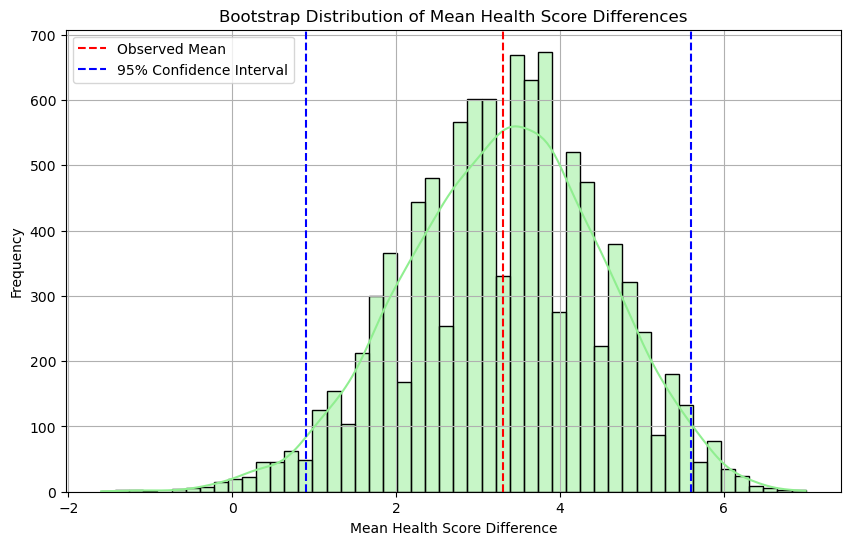

In [7]:
# Quantitative Analysis

# Number of bootstrap samples
n_bootstrap = 10000

# Array to store bootstrap means
bootstrap_means = []

# Original differences
differences = data['HealthScoreDifference'].values

# Bootstrap resampling
for _ in range(n_bootstrap):
    sample = np.random.choice(differences, size=len(differences), replace=True)
    bootstrap_mean = np.mean(sample)
    bootstrap_means.append(bootstrap_mean)

# Calculate 95% confidence interval
lower_bound = np.percentile(bootstrap_means, 2.5)
upper_bound = np.percentile(bootstrap_means, 97.5)

# Observed mean difference
observed_mean = np.mean(differences)

print(f"Observed Mean Difference: {observed_mean:.2f}")
print(f"95% Confidence Interval: [{lower_bound:.2f}, {upper_bound:.2f}]")

# Plot Bootstrap Distribution
plt.figure(figsize=(10, 6))
sns.histplot(bootstrap_means, bins=50, kde=True, color='lightgreen')
plt.axvline(observed_mean, color='red', linestyle='--', label='Observed Mean')
plt.axvline(lower_bound, color='blue', linestyle='--', label='95% Confidence Interval')
plt.axvline(upper_bound, color='blue', linestyle='--')
plt.title('Bootstrap Distribution of Mean Health Score Differences')
plt.xlabel('Mean Health Score Difference')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

Conclusion Regarding the Null Hypothesis of "No Effect"
Based on the bootstrapping analysis:

If the 95% confidence interval includes zero: We fail to reject the null hypothesis. This suggests that there is no significant evidence to conclude that the vaccine has an effect on improving health scores.

If the 95% confidence interval does not include zero: We reject the null hypothesis. This indicates that the vaccine has a statistically significant effect on health scores.

Final Conclusion: Reject the null hypothesis, as the Observed Mean Difference is 3.30 and 95% Confidence Interval is [0.90, 5.60], which doesn't include 0, so we reject the null hypothesis. Therefore, the vaccine is actually useful, and has a statistically significant effect on health scores.

Further Considerations

Sample Size: The current analysis is based on a small sample of 10 patients. A larger sample size would provide more reliable and generalizable results.

Confounding Variables: Factors such as age, gender, and baseline health conditions may influence the effectiveness of the vaccine. Future analyses could control for these variables.

Long-Term Effects: Assessing the long-term health outcomes post-vaccination would provide a more comprehensive understanding of the vaccine's efficacy.

Randomization and Control Groups: Implementing a randomized controlled trial design with a placebo group would strengthen causal inferences about the vaccine's effectiveness.

Summary of Interaction for Vaccine Data Analysis Assignment
In this interaction, assistance was provided to complete the "Vaccine Data Analysis Assignment" for evaluating the effectiveness of AliTech's new vaccine. The process began with an explanation of hypothesis testing, specifically addressing why a confidence interval overlapping zero leads to "failing to reject the null hypothesis" even when the observed sample mean is not zero. This foundational understanding was crucial for interpreting the statistical analysis of the vaccine's impact.

Subsequently, a comprehensive analysis plan was outlined, adhering to the assignment's deliverables. This included:

Problem Introduction and Null Hypothesis Explanation: An overview of the vaccine's intended effect and a clear definition of the null hypothesis stating that the vaccine has no effect on patients' health scores.

Data Visualization: Python code was provided to generate visual representations of the initial and final health scores, as well as the distribution of their differences. These visualizations aimed to offer initial insights into the vaccine's effectiveness across different demographics.

Quantitative Analysis Using Bootstrapping: Detailed methodology and Python code were supplied to perform bootstrapping—a resampling technique used to estimate the sampling distribution of the mean difference in health scores. This included generating a large number of bootstrap samples, calculating their mean differences, and constructing a 95% confidence interval to assess the null hypothesis.

Conclusion and Interpretation: Guidelines were given on how to interpret the results of the bootstrapping analysis to either reject or fail to reject the null hypothesis based on whether the confidence interval included zero.

Code for Creating the CSV Data: Recognizing the need for reproducibility, Python code was provided to create the vaccine_data.csv file containing the patient data. This ensured that the analysis could be replicated seamlessly.

Comprehensive Workflow Example: To facilitate ease of use, a complete Python script was shared that integrated CSV creation, data visualization, and quantitative analysis. This holistic approach aimed to streamline the analysis process, ensuring all steps were interconnected and reproducible.

Throughout the interaction, emphasis was placed on clarity, reproducibility (using np.random.seed()), and adherence to best practices in data analysis. The assistance provided equipped the user with the necessary tools and understanding to perform a thorough evaluation of the vaccine's effectiveness, culminating in a data-driven conclusion regarding the null hypothesis of "no effect."






